# When AWS Lead The Cloud Market, Can Google Catch Up? 

<span style='color:red'>WARNING! This notebook analysis is under construction. Proceed with caution.</span>

## Abstract
Currently, AWS dominate the cloud computing industry, but Google is trying to catch up with their product, Google Cloud Platform. A simple analysis in the notebook shows that people are just as interested in Google Cloud Platform than Amazon Web Services, even though the latter currently is the market leader. The author further analyzed the data to find out which type of survey respondents more interested towards Google Cloud Platform rather than Amazon Web Services. We found that research scientists, doctoral degree holders and those who never have experience writing code are the ones who are most interested in Google Cloud Platform. On the other hand, software engineers, project managers, bachelor's degree holders and those who have between 1-5 experience in writing code are the ones who are most interested in learning Amazon Web Services.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
import os
import re

# To Avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# helper functions
def count_ma(df, normalize=False):
    if normalize == False:
        count_result = df.count()
    else:
        count_result = df.count() / df.count().sum()
    return pd.Series(count_result.values, index=df.mode().iloc[0].values)

def count_val(data, normalize=False):
    if isinstance(data, pd.Series):
        return data.value_counts(normalize=normalize).sort_values()
    elif isinstance(data, pd.DataFrame):
        return count_ma(data, normalize=normalize).sort_values()

def concat_h(ls):
    pd.concat(ls, axis=1).drop(index=['None', 'Other'])
    
def mcnemar_pipe_pval(i):
    dt = df[df['Q15'] == i][['Q27_B_Part_1', 'Q27_B_Part_3']].pipe(pd.get_dummies)
    ct = pd.crosstab(dt.iloc[:,0], dt.iloc[:,1])
    return mcnemar(ct).pvalue
    
plt.style.use('seaborn')
mpl.rcParams.update({'axes.spines.left': False, 
                     'axes.spines.right': False, 
                     'axes.spines.bottom': False, 
                     'axes.spines.top': False, 
                     'axes.grid': True, 
                     'axes.grid.axis' : 'both',
                     'axes.facecolor': 'white',
                     'grid.color': 'grey',
                     'grid.alpha': '0.2',
                     'axes.facecolor':'white'})
    
df_source = pd.read_csv('kaggle_survey_2021_responses.csv')
df_questions = df_source.loc[0,:]
df = df_source.loc[1:,:]

## Introduction
The popularity of Google and their products could not be underestimated. Many people know google because many of their products provide great value to users. Several of these products that are most popular include Search, Maps, Android, Google Docs, Youtube and Chrome. Actually, google has hundreds more products. Some of these products even possess more than 1 billion users, which is a staggering number of users. The success of Google products enable them to become a household name in the tech industry, which is why when Google launches a new product, all eyes will be set on Google products, as those products were met with high anticipation and expectations.

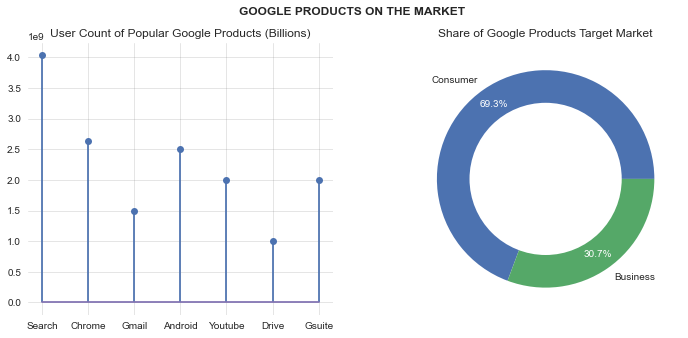

In [4]:
#google search: market share of google share * total size of internet users (92.6%* (56.727% * 7.68B internet users in 2019, the world bank))
google_usercount = pd.Series({'Search': 0.926*0.56727*7680000000,
                        'Chrome': 2640000000, 
                        'Gmail': 1500000000, 
                        'Android': 2500000000,
                        'Youtube': 2000000000,
                        'Drive': 1000000000, 
                        'Gsuite': 2000000000})

google_target = pd.Series({'Consumer': 70, 'Business': 31})

f, ax = plt.subplot_mosaic([[0,1]],figsize=(12,5))
ax[0].stem(google_usercount.index, google_usercount.values,)
ax[0].set_title('User Count of Popular Google Products (Billions)')
patches, texts, autotexts = ax[1].pie(google_target.values, labels=google_target.index, 
                                      autopct=lambda x: "{:1.1f}%".format(x),
                                      pctdistance=0.84)
[autotext.set_color('white') for autotext in autotexts]
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].set_title('Share of Google Products Target Market')
f.suptitle('GOOGLE PRODUCTS ON THE MARKET', fontweight='bold')
f.show()
#data in 2019, source not written yet.

The left side visualization shows 7 most popular Google products. We can see that all of the products reached more than one billion users. The largest one, Google Search, leads with about 4 billion users. Chrome is the second most used product with about 2.6 billion users, followed by Android with about 2.5 billion users. Most of Google's successful products are intended for the general consumer market. In fact, there are less Google popular products intended for the business market. in the left-side visualization, only Gsuite intended for the business market. In addition, list of google products shown in https://about.google/products/ shows that 69.3% of their products are intended for the consumer market, with only 30.7 intended for the business market.

## What About The Cloud Business?

We can see that Google dominates the market when it comes to the consumer products. However, the same cannot be said about their business products.

For example, Let us take a look at the state of the cloud computing industry. The products of this industry, simply put, powers the internet. People increasingly rely on cloud computation products to build and deploy applications. The industry leader in this space as of 2021 is Amazon with their Amazon Web Services line of products. According to Amazon, the total user count of AWS in 2016 exceeds 1.000.000 (There is actually a debate about how this metric is defined, but that's another story). With total active users in the millions, not billions like some of the google products, it seems like users count is much lower than google consumer products, however end consumers are not really familiar with it. However, these active users are all paying customers. Therefore, the industry leaders of this space are almost guaranteed to rack in a lot money.

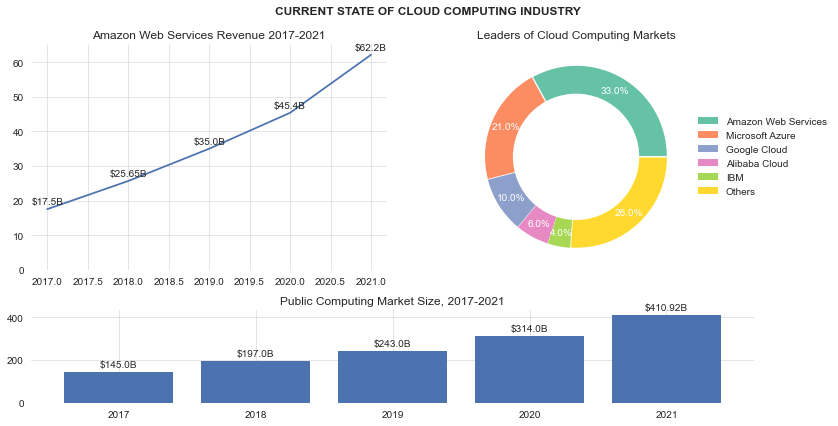

In [15]:
cloud_market_share = pd.Series({'Amazon Web Services': 33, 
                                'Microsoft Azure': 21, 
                                'Google Cloud': 10, 
                                'Alibaba Cloud':6, 
                                'IBM': 4, 
                                'Others': 26})
#source: Synergy Research Group.

cloud_market = pd.DataFrame.from_dict({2021:[62.2,410.92], 
           2020: [45.4,314], 
           2019: [35.0,243], 
           2018: [25.65,197], 
           2017: [17.5,145]}, orient='index', columns=['AWS_Revenue', 'Total_Market_Size'])
#source: AWS Financial Statements.
#source = Statista
f, ax = plt.subplot_mosaic([[0,1], [0,1], [2,2]], figsize=(12,6))
#aws revenue
rect = ax[0].bar(cloud_market.index, cloud_market['AWS_Revenue'], width=0)
ax[0].bar_label(rect, labels=[f'${x}B' for x in cloud_market['AWS_Revenue']], padding=3)
ax[0].plot(cloud_market.index, cloud_market['AWS_Revenue'])
ax[0].set_title('Amazon Web Services Revenue 2017-2021')
#cloud market
patches, texts, autotexts = ax[1].pie(cloud_market_share.values, 
              labels=cloud_market_share.index, 
              autopct=lambda x: "{:1.1f}%".format(x), 
              pctdistance=0.84,
              explode = np.repeat(0.01,len(cloud_market_share)), 
              labeldistance=None, colors=sns.color_palette('Set2',n_colors=len(cloud_market_share)))
[autotext.set_color('white') for autotext in autotexts] 
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title('Leaders of Cloud Computing Markets')
ax[1].add_artist(plt.Circle((0,0),0.7,fc='white'))
#total marekt size
rect = ax[2].bar(cloud_market.index, cloud_market['Total_Market_Size'])
ax[2].bar_label(rect, labels=[f'${x}B' for x in cloud_market['Total_Market_Size']], padding=3)
# ax[2].plot(cloud_market.index, cloud_market['Total_Market_Size'])
ax[2].grid(color='grey')
ax[2].set_title('Public Computing Market Size, 2017-2021')
f.tight_layout(rect=[0,0,1,0.95])
f.suptitle('CURRENT STATE OF CLOUD COMPUTING INDUSTRY', fontweight='bold')
f.show()

In this industry, Amazon leads with their Amazon Web Services (AWS) range of products. AWS posted \\$62.2B of annual revenue figure in 2021, which is higher than the GDP of Bulgaria. Compared to the market leader, Google with their line of cloud computing products, Google Cloud Platform (GCP) trails only in third position. This situation definitely does not reflect their success in the consumer tech industry. Cloud computing market is very important because as more people use more products from the web, these figures are likely to increase. In fact, the market grows to an astounding $411B in 2021 from \\$145B  in 2017, an increase of almost three fold in 4 years.

## Are People Still Interested in Google Cloud Products?
Even though AWS leads the cloud computing industry to date, a survey from Kaggle, a website geared towards data science and machine learning community, shows an interesting results.

Kaggle is a website geared towards data science and machine learning community owned by Google. Every year, Kaggle released a survey to its community to learn about the current state of data science and machine learning. This year, the survey was launched from 09/01/2021 to 10/04/2021 and generated about 25973 responses. The survey asks the community about many things. One of them is about what cloud computing platform the respondents are most regularly used and how much interest in learning them. Here are the visualization of the questions response.

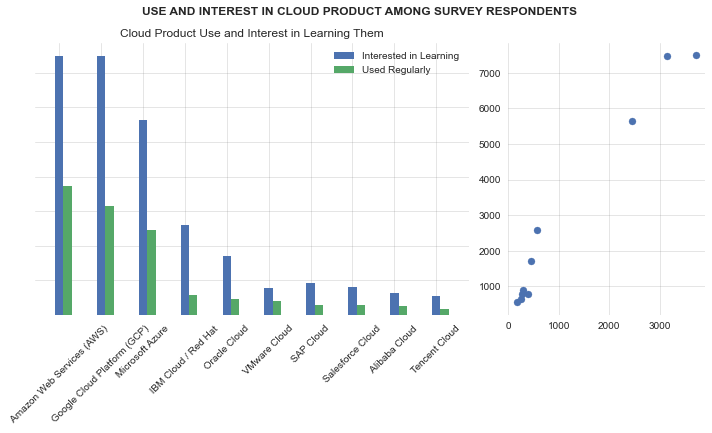

In [8]:
# cloudname_reg = re.sub(r' \(.+\) - .+ - .+', '', df_questions.Q27_A_OTHER)
cloud_reg = count_val(df.loc[:,'Q27_A_Part_1':'Q27_A_OTHER']).rename('regularly_used')
cloud_int = count_val(df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER']).rename('interested')
cloud_ux = count_val(df['Q28']).rename('experience')
cloud = pd.concat([cloud_reg, cloud_int, cloud_ux], axis=1).sort_values('regularly_used', ascending=False)
#warning! this line removes some important data!
cloud = cloud.drop(index=['None', 'Other', 'None were satisfactory', 'They all had a similarly enjoyable developer experience'])

f, ax = plt.subplot_mosaic([[0,0,1],
                            [0,0,1]],figsize=(12,5))

pos = np.arange(len(cloud.index))
width = 0.2

ax[0].bar(pos-width, cloud['interested'], width=width, label = 'Interested in Learning')
ax[0].bar(pos, cloud['regularly_used'], width=width, label = 'Used Regularly')
ax[0].tick_params(left=False, labelleft=False)
ax[0].set_xticks(pos-width)
ax[0].set_xticklabels(cloud.index, rotation=45)
ax[0].legend()
ax[0].set_title('Cloud Product Use and Interest in Learning Them')
ax[1].scatter(cloud['regularly_used'], cloud['interested'])
f.suptitle('USE AND INTEREST IN CLOUD PRODUCT AMONG SURVEY RESPONDENTS', fontweight='bold')
plt.show()

To understand this chart, one must remember the context, that is, AWS is a leader in the cloud computing industry. From this fact, it follows to reason that respondent's interest in learning a certain cloud computing platform will follow how much the platform in question is used in practice. In other words, respondents should be more interested in AWS rather than GCP.

From this chart, it looks like people are just as interested in Google Cloud Products than AWS products, even though AWS is much more regularly used in practice. This is quite surprising, because the interest of engineers to learn AWS should be correlated to how much they are used in practice. Take a look at Microsoft Azure or IBM Cloud, for example. They are used much less in the industry, so people are less interested in learning them compared to learning AWS. 

Furthermore, we are getting a strong correlation between how regularly a product is regularly used and how interested people to learn that product. Note that this correlation is shown only to illustrate the tendency of these two variables to be related, we cannot inspect its significance because of the low sample size and thus low statistical power.

Next, we will inspect the same variables on another subproducts of cloud computing: their compute platforms, which is used to represent virtual machines on the respective cloud computing platforms.

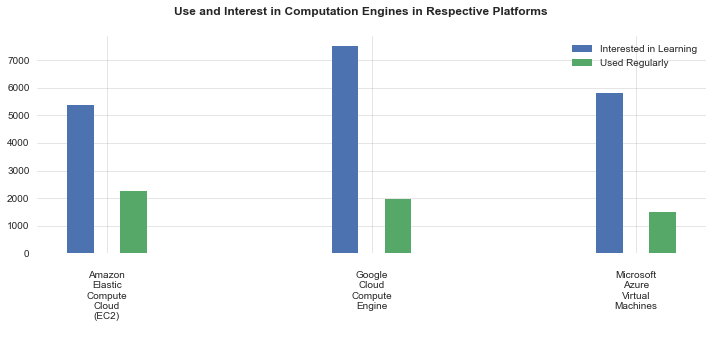

In [14]:
cloud_compute = pd.concat([count_val(df.loc[:,'Q29_A_Part_1':'Q29_A_OTHER']).rename('Regularly Used'),
                           count_val(df.loc[:,'Q29_B_Part_1':'Q29_B_OTHER']).rename('Most Interested')],
                          axis=1).drop(['None','No / None', 'Other']).reset_index()
cloud_compute['index'] = cloud_compute['index'].str.replace(' ', '\n')

pos = np.arange(len(cloud_compute))
width = 0.1

f, ax = plt.subplots(figsize=(12,4))
ax.bar(pos+width, cloud_compute['Most Interested'], width=width, label = 'Interested in Learning')
ax.bar(pos-width, cloud_compute['Regularly Used'], width=width, label = 'Used Regularly')
ax.set_xticks(pos)
ax.set_xticklabels(cloud_compute['index'])
ax.legend()
f.suptitle('Use and Interest in Computation Engines in Respective Platforms', fontweight='bold')

ax.invert_xaxis()

From the visualization, we can see that people are more interested in learning Google Cloud Compute Engine than Amazon Elastic Compute Cloud (EC2) Or Microsoft Azure Virtual Machines. Thus, the interest in this Google subproduct is even higher than the Amazon subproduct counterpart. In order to understand why the respondent's interest in Google products could be quite high, we will explore possible factors contributing to this phenomenon.

## The Composition of Survey Respondents
Before going into the data, it's worth to take a look at the dataset's respondents demographics. 

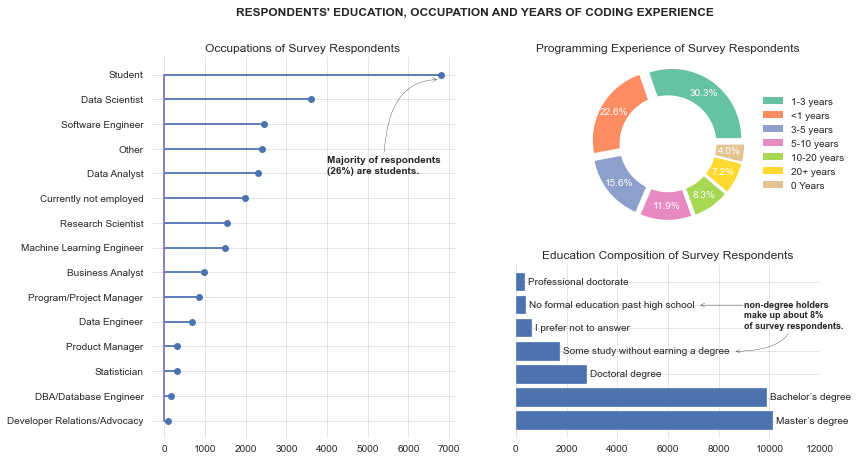

In [6]:
occupation = df['Q5'].value_counts().sort_values()

education = df['Q4'].value_counts().reset_index()
education['index'] = education['index'].replace("Some college/university study without earning a bachelor’s degree", 
                                                "Some study without earning a degree")

coding_exp = df['Q6'].value_counts().reset_index()
coding_exp['index'] = coding_exp['index'].replace({'I have never written code':'0 Years', '< 1 years': '<1 years'})
coding_exp['sorter'] = coding_exp['index'].replace({'0\nYears':0,
                                                     '<1\nyears':1,
                                                     '1-3\nyears':2,
                                                     '3-5\nyears':3,
                                                     '5-10\nyears':4,
                                                     '10-20\nyears':5,
                                                     '20+\nyears':6})

coding_exp.sort_values(by='sorter')

f, ax = plt.subplot_mosaic([[0,1],[0,2]], figsize=(12,7))
#occupation
ax[0].stem(occupation.index, occupation.values, orientation='horizontal')
ax[0].grid(axis='x', alpha=0.2, color='grey')
ax[0].annotate('Majority of respondents\n(26%) are students.', [6750,13.8], [4000, 10], arrowprops=dict(arrowstyle="->",
                        connectionstyle="angle3"), fontweight='bold')
ax[0].set_title('Occupations of Survey Respondents')
#experience
patches, texts, autotexts = ax[1].pie(coding_exp['Q6'], labels=coding_exp['index'], 
          autopct=lambda x: "{:1.1f}%".format(x), 
          pctdistance=0.80, 
          explode=np.repeat(0.1,7), 
          labeldistance=None, colors=sns.color_palette('Set2',n_colors=8))
[autotext.set_color('white') for autotext in autotexts] 
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title('Programming Experience of Survey Respondents')
#education
rect = ax[2].barh(education['index'], education['Q4'], edgecolor='white')
ax[2].bar_label(rect, labels=education['index'], padding=3)
ax[2].set_xlim(0,12000)
ax[2].tick_params(left=False, labelleft=False)
ax[2].grid(axis='x', alpha=0.2, color='grey')
ax[2].set_title('Education Composition of Survey Respondents')
ax[2].annotate('non-degree holders\nmake up about 8%\nof survey respondents.', 
               [8600,3], [9000, 4], 
               arrowprops=dict(arrowstyle="->", connectionstyle="angle3"), fontweight='bold', size=9)
ax[2].annotate('', [7200,5],[9000, 5], 
               arrowprops=dict(arrowstyle="->", connectionstyle="angle3"))
f.suptitle("RESPONDENTS' EDUCATION, OCCUPATION AND YEARS OF CODING EXPERIENCE", fontweight='bold')
plt.show()

There are a lot of things we could discuss, but we will focus our attention first on the occupations part of the survey respondents. The largest percentage of survey respondents are students (26%). Next in line are data scientists and software engineers, while data analysts are placed in fourth. The number of student respondents are quite significant in this dataset, more than double the number of data scientists and almost triple the number of data analysts.

The interesting part about being a "student" is that people could assume that they come from data science-related major (Mathematics and Economics, for example). However, a student in this survey could pursue any major imaginable, because it is highly possible that people are learning data science even though they don't come from a data science related background. This situation begs the question whether these group of students actually possess enough knowledge about cloud computation. Actually, a bit of clarity about this question can be addressed by analyzing each of respondents' major. Unfortunately, Kaggle didn't include a question about it (maybe due to the highly numerous options that people can major in), thus this question remains unanswered.

Even though the largest group of respondents have 1-3 years of coding experience (30.3%), There is a significant part of respondents that are just start learning to code (22.6%) and further 4% admits that they never written a single line of code. This is yet another clue that points to the evidence that there is a significant part of survey respondents lacking experience in the field, thus maybe also lack experience about engineering in the cloud.

It is also revealed that most kaggle respondents either have or currently pursuing a Bachelor's or Master's degree. However, just like the problem presented above, we don't know whether the major they pursue comes from a technical background. In addition, 8% of survey respondents consists of people that don't have a degree.

To summarize, by analyzing the demographics we are seeing a significant part of survey respondents that are lacking experience in the field of data science. Thus, it could be questioned whether these groups of people actually have enough knowledge and experience about cloud computation. Therefore, their interest in learning a given cloud technology might have been affected by other factors besides experience and knowledge about cloud computation.

## What Kind of Respondents Choose GCP?
To uncover a little bit about this phenomenon, we aim to look at the composition of those who prefers AWS and those who prefers GCP. To accomplish this, we aim to analyze several variables related to the choice of cloud computing platform: their occupations, programming experience, level of degree and machine learning experience.

In [16]:
occ_cloud = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].groupby(df['Q5']).count()

occ_cloud.columns = (df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].mode()
                             .T[0]
                             .str.replace(r'^ | $', '', regex=True)
                             .values)

occ_cloud['diff'] = occ_cloud.iloc[:,0] - occ_cloud.iloc[:,1]

occ_cloud['mcnemar_pval'] = [mcnemar_pipe_pval(i) for i in occ_cloud.index]

occ_cloud.sort_values('diff')

IndexError: single positional indexer is out-of-bounds

In [ ]:
pos = np.arange(len(occ_cloud))
height = 0.3

f, ax = plt.subplots()
ax.barh(pos-height/2, occ_cloud.iloc[:,0], height = height, label='AWS')
ax.barh(pos+height/2, occ_cloud.iloc[:,1], height = height, label='GCP')
ax.set_yticks(pos, occ_cloud.index)
ax.legend()
f.show()

Software engineers and project managers are significantly more interested Amazon Web Services. Database engineers also are more interested in learning AWS, although note that there are not much of them in the survey, thus the results' statistical power might not be as strong. On the other side, we found that research scientists are the only ones who are more interested in learning Google Cloud Platform. The rest of the respondents does not significantly differ in their interest about learning AWS than the GCP.

Software engineers and project managers are the ones who deal with cloud computing the most. Because they are more familiar with cloud computation technologies than other tech professionals, it is natural that they tend to be interested more in AWS because AWS is the market leader in the cloud computation business.

The interesting thing we found is that research scientists are the only ones who are more interested in learning Google Cloud Platforms. Unfortunately, answering why there are a significant amount of research scientists that prefers google cloud platforms is outside the scope of this analysis, but future analysis may aim to uncover if there is anything about Google Cloud Platforms that caters well to the needs of research scientists.

In [17]:
test_codetable = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].groupby(df['Q6']).count()

test_codetable.columns = (df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].mode()
                             .T[0]
                             .str.replace(r'^ | $', '', regex=True)
                             .values)

test_codetable['diff'] = test_codetable.iloc[:,0] - test_codetable.iloc[:,1]

test_codetable['mcnemar_pval'] = [mcnemar_pipe_pval(i) for i in test_codetable.index]

test_codetable.sort_values('diff')

IndexError: single positional indexer is out-of-bounds

In [ ]:
pos = np.arange(len(test_codetable))
height = 0.3

f, ax = plt.subplots()
ax.barh(pos-height/2, test_codetable.iloc[:,0], height = height, label='AWS')
ax.barh(pos+height/2, test_codetable.iloc[:,1], height = height, label='GCP')
ax.set_yticks(pos, test_codetable.index)
ax.legend()
f.show()

The results are even more interesting to look at. Those who never written code are significantly more interested in learning Google Cloud Platform. On the other hand, those who have 1-5 years of experience in writing code prefers AWS over GCP. Finally, those who have more than 5 years of experience didn't show any significant differences. 

Astute readers might have realized that there is a small pattern: those who have never written code might not know much about cloud computing platforms, so they place their interest in whatever is familiar with them. this led them to choose Google platforms, since they are probably already familiar with google consumer products. 

Those who have 1-5 years of experience writing code are the ones who are starting to gain experience, so they just follow the industry standard. Since many companies utilize AWS, that's where they put their interest of learning on.

Those who have more than 5 years of experience are the most experienced of the bunch, they probably have mastered both cloud computing platforms. This may explain why they see no difference of interest in learning between these two cloud computing platforms.

In [ ]:
test_degreetable = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].groupby(df['Q4']).count()

test_degreetable.columns = (df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].mode()
                             .T[0]
                             .str.replace(r'^ | $', '', regex=True)
                             .values)

test_degreetable['Difference'] = test_degreetable.iloc[:,0] - test_degreetable.iloc[:,1]

test_degreetable['McNemar_Pvalue'] = [mcnemar_pipe_pval(i) for i in test_degreetable.index]

test_degreetable.sort_values('Difference', inplace=True)
test_degreetable

In [ ]:
pos = np.arange(len(test_degreetable))
height = 0.3

f, ax = plt.subplots()
ax.barh(pos-height/2, test_degreetable.iloc[:,0], height = height, label='AWS')
ax.barh(pos+height/2, test_degreetable.iloc[:,1], height = height, label='GCP')
ax.set_yticks(pos, test_degreetable.index)
ax.legend()
f.show()

The results show that both those who don't have a degree and doctorate degree holders are the ones who are most interested in learning GCP. On the other hand, those who hold a bachelor's degree are significantly more interested in learning AWS.


What can we conclude?
people who are more knowledgable, and involved in day-to-day life about cloud computing tend to prefers AWS over GCP. This could be explained by AWS' status as the industry standard, thus people in this category tend to be interested in learning AWS. 

In [ ]:
test_exptable = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].groupby(df['Q15']).count()

test_exptable.columns = (df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].mode()
                             .T[0]
                             .str.replace(r'^ | $', '', regex=True)
                             .values)

test_exptable['diff'] = test_exptable.iloc[:,0] - test_exptable.iloc[:,1]

test_exptable['mcnemar_pval'] = [mcnemar_pipe_pval(i) for i in test_exptable.index]

test_exptable.sort_values('diff')

When talking about machine learning experience, we are getting a completely different results here. Those who are having minimal experience with machine learning (don't use ML up to <=2 years of experience) are the ones who are most interested in learning AWS. On the other hand, those who are experienced with machine learning for 2-4 years are interested in learning GCP. Finally, those who are more experienced than 4 years didn't seem to differ.

This also raises the assumption that people that are working in data are going to be much more familiar to cloud platforms. For the first 2 years learning ML, they are going to use amazon because it's simply what everybody uses. next 2 years they are going to learn GCP to broaden their skills. after 4 years, nothing might seem to differ because they have mastered both.

This might be because those who have more than 4 years of experience already mastered both AWS or GCP (but if they do, why do they bother choosing?. check the percentage of people who are interested vs total, then compare it with other experience level. see if they are about the same or much less. if they are much less, then it might be safe to assume that these guys are indeed experienced in both.)

## Could There be A Hidden Advantage?

While AWS tend to saturate current state of cloud computing business, GCP is still gripping the market in consumer products. This presents a unique opportunity for GCP, because their brand strength makes those who aren't in the cloud business industry to be more familiar with google products than AWS products. to earn this new customer base (banyak ga customernya?), GCP may be able to target new comers and those who are outside of the industry by good user experience and incredible pricing (why ux & pricing important?)

Also, those who are experienced in aws might want to broaden their skills by having some experience in GCP. by giving effective learning programs, google might have a chance to grab this specific market.

But to be truly successful in this ecosystem, Google may have to convince businesses to choose their products over AWS. They may be able to do this by selecting specific target market, giving competitive pricing, or building a competitive advantage(how?)

With this out of the way, the author reminds the reader about the limitation of this analysis. First, this survey is built by Kaggle, a website geared towards machine learning and data science community. Therefore, there is a huge limitation in terms of the results' generalizability.

Second, this analysis didn't attempt to provide answers about the assumptions made in this analysis. While the assumptions and hypotheses provided in this analysis may sound tempting to be treated as true reasons for the phenomena presented, the assumptions lacks validation and is not proven by controlled research. A better treatment for the assumptions provided in this analysis is to treat them like an indication towards something. to provide validation about these assumptions, A better, more whole analysis about cloud computing consumers could be done with another research methods. This is also to remind everyone that this method, still has some limitations despite its popularity.

even though amazon is the market leader, the users didn't really seem to care about their interest in learning one. Our assumptions about amazon being market leaders therefore more people will be interested is shattered. future analysis could attempt to uncover why is that the case. Among those two providers there are a bit differences between how chooses GCP over AWS, but in most cases the differences are slight.

## About The Dataset

### Country of Origin, Age and Gender

The dataset comes with several demographic questions, which will be visualized here. First off, we will break down the demographics of those who responded to the survey. There are however, a lot of demographic questions being asked on the survey. We will divide those questions in two parts: the first part (which we are going to take a look now) contains a more general demographic data, like age, gender and country of origin.

In [ ]:
#prepare the data
# this code retrieves the percentage of respondents in each income bracket, each for coders and noncoders.
# the data will be saved in 'income_data' variable.
noncoder_filt = df['Q6'] == 'I have never written code'
income_data = pd.concat([df.loc[noncoder_filt, 'Q25'].value_counts(normalize=True).rename('noncoders'),
                         df.loc[~noncoder_filt, 'Q25'].value_counts(normalize=True).rename('coders')], axis=1).reset_index()
# this code transforms the income value from string to float, so we can sort it.
# we can use mapping for the replace but it's faster to do str replace twice.
income_data['sorter'] = income_data['index'].str.replace(r'.+-|>\$', '', regex=True).str.replace(',', '', regex=True).astype(np.double)
# noncoders with income more than $1,000,000 is NaN. We replace it with 0. 
income_data.fillna(0, inplace=True)
income_data.sort_values('sorter', inplace=True)
# income_data ready.

#countries
top_countries = df['Q3'].value_counts().head(10).sort_values().reset_index()
top_countries['index'] = top_countries['index'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK', 
                                                      'United States of America': 'US'})
#age
age = df['Q1'].value_counts()
#gender
gender = df['Q2'].replace({
    'Prefer not to say': 'Others',
    'Nonbinary': 'Others',
    'Prefer to self-describe': 'Others'
}).value_counts()


#render figure
f, ax = plt.subplot_mosaic([[0,2],[0,1]], figsize=(12,7))
#income
ax[0].plot(income_data['index'], income_data['noncoders'], label='noncoder')
ax[0].plot(income_data['index'], income_data['coders'], label='coder')
ax[0].set_yticks(np.linspace(0,0.35,7), labels=[f'{x}%' for x in np.arange(0,35,5)])
ax[0].set_title('Income Brackets of Coders and Noncoders')
ax[0].annotate('lower income brackets\ntend to be occupied more\nby non programmers..', [5,0.075], [1.5, 0.130], arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"))
ax[0].annotate('.. While coders\noccupy more percentage\nin higher income brackets.', [18,0.05], [15, 0.080], arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"))
ax[0].set_xticks([income_data.loc[0,'index'], income_data.loc[0,'index'][-1]],
                ['<$999','>$1.000.000'])
ax[0].legend()
#age
rect_age = ax[1].bar(age.index, age.values)
ax[1].bar_label(rect_age, padding=4)
ax[1].set_xticks(age.index)
ax[1].set_xticklabels(age.index, rotation=45)
ytick = np.arange(0,7000,1000)
ax[1].set_yticks(ytick, labels = [0,'','','','','',6000])
ax[1].set_ylim(0,6000)
ax[1].set_title('Age Composition of Survey Respondents')
#gender
colors = ['#ff9999','#66b3ff','#99ff99']
patches, texts, autotexts = ax[2].pie(gender.values, 
          labels=gender.index, 
          colors=sns.color_palette('Set2',n_colors=3), 
          autopct=lambda x: "{:1.1f}%".format(x), 
          pctdistance=0.80,
          explode = (0.0,0.1,0.15), 
          labeldistance=None)
[autotext.set_color('white') for autotext in autotexts]
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax[2].set_title('Gender Composition of Survey Respondents')
ax[2].add_artist(plt.Circle((0,0),0.60,fc='white'))
#add suptitle
f.suptitle('AGE, GENDER AND COUNTRY OF ORIGIN OF KAGGLE 2021 SURVEY RESPONDENTS', fontweight='bold')
f.show()

From the data above, we can see that the largest groups of the respondents were dominated by males aged 18-29 years old. India, by a lot margin, led the way as the top country of origin of the survey respondents. After India, the US follows, and then those who answered "Other". 4 Asian countries were among the top 10: India, Japan, China and Pakistan, while Brazil represents the largest group from the South American continent, Nigeria represents the African continent, and finally Russia and United Kingdom represents the European continent.

Next, we will look at the respondents' education, occupation and years of coding experience.

 ### Education, Occupation and Years of Coding Experience
 
 For each survey answers, we will count each respondents' answers then plot it with matplotlib.

In [ ]:
occupation = df['Q5'].value_counts().sort_values()

education = df['Q4'].value_counts().reset_index()
education['index'] = education['index'].replace("Some college/university study without earning a bachelor’s degree", 
                                                "Some study without earning a degree")

coding_exp = df['Q6'].value_counts().reset_index()
coding_exp['index'] = coding_exp['index'].replace({'I have never written code':'0 Years', '< 1 years': '<1 years'})
coding_exp['sorter'] = coding_exp['index'].replace({'0\nYears':0,
                                                     '<1\nyears':1,
                                                     '1-3\nyears':2,
                                                     '3-5\nyears':3,
                                                     '5-10\nyears':4,
                                                     '10-20\nyears':5,
                                                     '20+\nyears':6})

coding_exp.sort_values(by='sorter')
with mpl.rc_context({'axes.spines.left': False, 
                     'axes.spines.right': False, 
                     'axes.spines.bottom': False, 
                     'axes.spines.top': False, 
                     'axes.facecolor':'white'}):
    f, ax = plt.subplot_mosaic([[0,1],[0,2]], figsize=(12,7))
    #occupation
    ax[0].stem(occupation.index, occupation.values, orientation='horizontal')
    ax[0].grid(axis='x', alpha=0.2, color='grey')
    ax[0].annotate('Majority of respondents\n(26%) are students.', [6750,13.8], [4000, 10], arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3"), fontweight='bold')
    ax[0].set_title('Occupations of Survey Respondents')
    #experience
    patches, texts, autotexts = ax[1].pie(coding_exp['Q6'], labels=coding_exp['index'], 
              autopct=lambda x: "{:1.1f}%".format(x), 
              pctdistance=0.80, 
              explode=np.repeat(0.1,7), 
              labeldistance=None, colors=sns.color_palette('Set2',n_colors=8))
    [autotext.set_color('white') for autotext in autotexts] 
    ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    ax[1].set_title('Programming Experience of Survey Respondents')
    #education
    rect = ax[2].barh(education['index'], education['Q4'], height=1, edgecolor='white')
    ax[2].bar_label(rect, labels=education['index'], padding=3)
    ax[2].set_xlim(0,12000)
    ax[2].tick_params(left=False, labelleft=False)
    ax[2].grid(axis='x', alpha=0.2, color='grey')
    ax[2].set_title('Education Composition of Survey Respondents')
    ax[2].annotate('non-degree holders\nmake up about 8%\nof survey respondents.', 
                   [8600,3], [9000, 4], 
                   arrowprops=dict(arrowstyle="->", connectionstyle="angle3"), fontweight='bold', size=9)
    ax[2].annotate('', [7200,5],[9000, 5], 
                   arrowprops=dict(arrowstyle="->", connectionstyle="angle3"))
f.suptitle("RESPONDENTS' EDUCATION, OCCUPATION AND YEARS OF CODING EXPERIENCE", fontweight='bold')
plt.show()

From the visualizations that we have created, it is revealed that most kaggle respondents either have or currently pursuing a Bachelor's or Master's degree. The largest percentage of kaggle survey respondents are students, followed by Data Scientists, Software Engineers, those who answered "Other", and Data Analysts. The respondents have mostly 1-3 years of coding experience under their belt.